In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def_c = ['#09F', '#09F']

def fig_size(xlim, ylim):
    ysize = ylim[1] - ylim[0]
    xsize = xlim[1] - xlim[0]
    return (xsize/ysize*5, 5)


# _Rankin half body_
$$ F(z) = Uz ,\quad z = x + iy $$

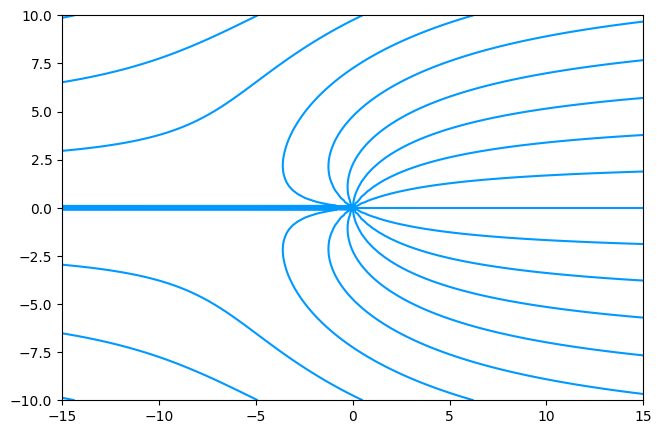

In [210]:
s = 0.5
U =20
m = 2*np.pi*U*s


xlim = [-15, 15]
ylim = [-10, 10]

X, Y = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

psi =  U*Y + (m/2*np.pi)*theta

fig, ax = plt.subplots(figsize=(fig_size(xlim, ylim)))

plt.contour(X, Y,  psi, 20, colors=def_c)
plt.show()


# Rankin Full body

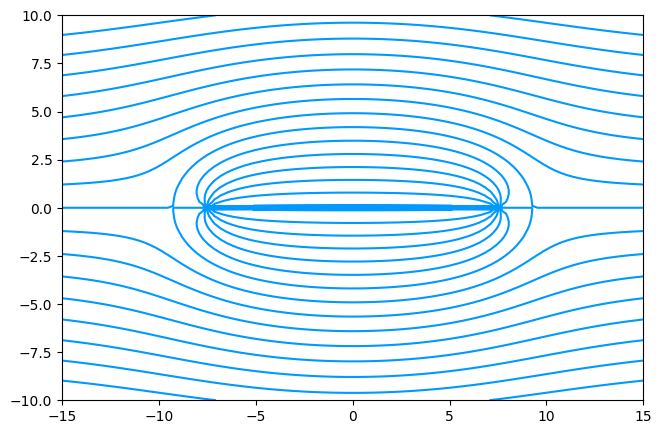

In [213]:
s =0.2
U =20
m = 2*np.pi*U*s
l = 7.5


xlim = [-15, 15]
ylim = [-10, 10]

X, Y = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
r = np.sqrt(X**2 + Y**2)
theta1 = np.arctan2(Y, X+l)
theta2 = np.arctan2(Y, X-l)

psi =  U*Y + (m/2*np.pi)*theta1 + -(m/2*np.pi)*theta2

fig, ax = plt.subplots(figsize=(fig_size(xlim, ylim)))
plt.contour(X, Y,  psi, 20, colors=def_c)
plt.show()

# Line Vortex

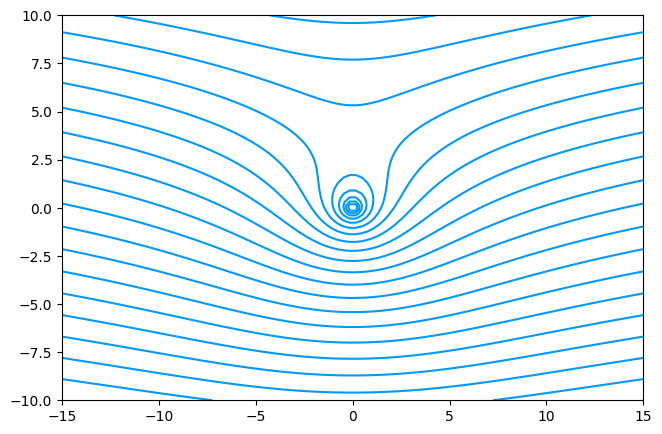

In [208]:
U = 5
circulation = 100


xlim = [-15, 15]
ylim = [-10, 10]

X, Y = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

fig, ax = plt.subplots(figsize=(fig_size(xlim, ylim)))

psi = -circulation*np.log(r) / (2*np.pi) +U*Y
plt.contour(X, Y,  psi, 20, colors=def_c)

# Doublet 

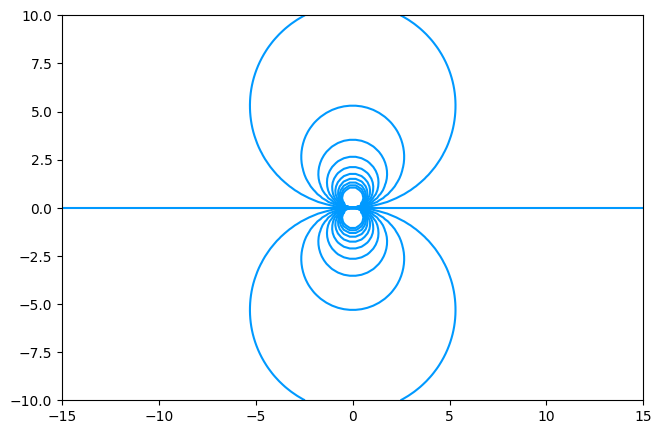

In [207]:
mu =10


xlim = [-15, 15]
ylim = [-10, 10]

X, Y = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

fig, ax = plt.subplots(figsize=(fig_size(xlim, ylim)))

psi = mu * np.sin(theta)/ (2*np.pi*r)
plt.contour(X, Y,  psi, 20, colors=def_c, levels=np.linspace(-1.5, 1.5, 21))



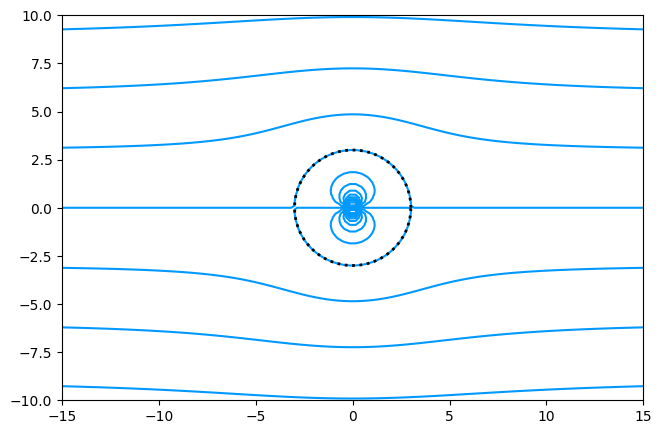

In [366]:
a = 3  # radius of cylinder
U = 10000 # free stream velocity

mu = a*a*2*np.pi*U

xlim = [-15, 15]
ylim = [-10, 10]

X, Y = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

fig, ax = plt.subplots(figsize=(fig_size(xlim, ylim)))

psi = -(mu * np.sin(theta)/ (2*np.pi*r)) + U*Y
ax.contour(X, Y,  psi, 20, colors=def_c)

t = np.linspace(0, 2*np.pi, 100)
x = a*np.cos(t)
y = a*np.sin(t)
ax.plot(x, y, color='k', linewidth=2, linestyle=':')

# Flow through a plate

2.5


(-10.0, 10.0)

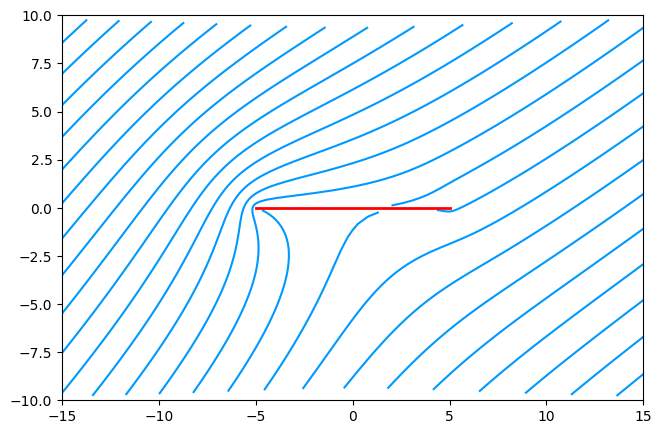

In [78]:
U = 10
a = 2.5
alpha = np.pi/4
circulation =-4*np.pi*a*U*np.sin(alpha)

print(a)

xlim = [-15, 15]
ylim = [-10, 10]

X, Y = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

fig, ax = plt.subplots(figsize=(fig_size(xlim, ylim)))

psi = -(U*a*a * np.sin(theta-alpha)/ r) + Y - (U*X/np.tan(alpha))  - circulation*np.log(r) / (2*np.pi) +U*Y
E = X + ((a*a*X) / (X*X + Y*Y))
N = Y - ((a*a*Y) / (X*X + Y*Y))

psi[np.where(r<a)] = np.nan

plate = np.linspace(-2*a, 2*a, 10)
y_plate = np.zeros_like(plate)

# ax.contour(X, Y,  psi, 20, colors=['red', 'red'])
ax.contour(E, N,  psi, 30, colors=def_c)
ax.plot(plate, y_plate, color='red', linewidth=2)
plt.xlim(xlim)
plt.ylim(ylim)

# Flow past Joukowski Aerofoils

3.686200378071834


(-10.0, 10.0)

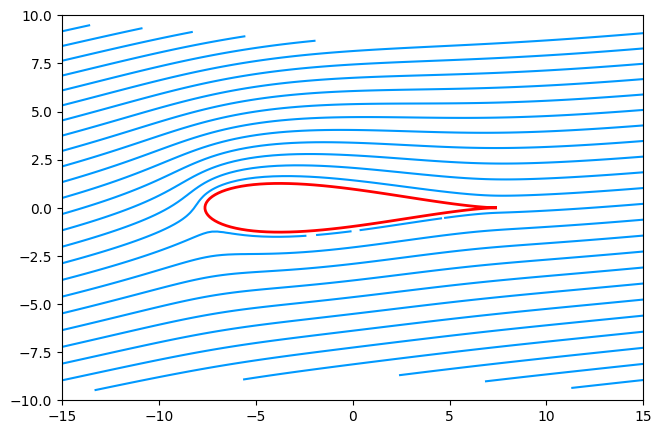

In [154]:
l = 15 # chord length
c = 0.15 # thickness?
U = 100 # free stream velocity
alpha = 0.15 # angle of attack

a = l*(1+2*c)/(4*np.power(1+c, 2))
print(a)
circulation =-4*np.pi*a*U*np.sin(alpha)*(1+c)

lift_coeff = 2*np.pi*np.sin(1+(c)/(1+c))

xlim = [-15, 15]
ylim = [-10, 10]

X, Y = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

Z = X + 1j*Y

fig, ax = plt.subplots(figsize=(fig_size(xlim, ylim)))

psi = np.imag( 
    U*np.exp(-alpha*1j)*(Z + a*c) + U*((a*(1+c))**2)*np.exp(1j*alpha)/ (Z+a*c) - 1j * circulation*np.log(Z+a*c)/(2*np.pi)
)

Zeta = Z + a*a / Z

psi[np.where((Z+a*(c))*np.conj(Z+a*(c)) < (a*(1+c))**2)] = np.nan

para_t = np.linspace(0, 2*np.pi, 100)
z = (a*(1+c)*np.exp(para_t*1j)) - a*c
zeta = z + a*a/(z)


# ax.contour(X, Y,  psi, 20, colors=['red', 'red'])
# ax.contour(X, Y,  psi, [0], colors=['green'])
# ax.plot(np.real(z), np.imag(z))

ax.contour(np.real(Zeta), np.imag(Zeta),  psi, 30, colors=def_c)
# ax.contour(np.real(Zeta), np.imag(Zeta),  psi,colors=def_c, levels = [-0.1, 0, 0.1])
ax.plot(np.real(zeta), np.imag(zeta), color='red', linewidth=2)
plt.xlim(xlim)
plt.ylim(ylim)